<a href="https://colab.research.google.com/github/NourAbouElMakarem/20P3076-Padel-System/blob/main/TC8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
# Specify the path to your image file in Google Drive
image_path = '/content/drive/My Drive/Uni Projects/cv/08-Compresso-Espresso.png'

# Load the image using cv2.imread
img8 = cv2.imread(image_path)

if img8 is not None:
    # Image was loaded successfully, you can proceed with further processing
    print(img8.shape)
    cv2_imshow(img8)  # cv2.imshow makes collab sketches crash, so use cv2_imshow instead
else:
    # Failed to load the image
    print("Error: Failed to load image from", image_path)

NameError: name 'cv2' is not defined

###Img dimentions

In [ ]:
print(img8.ndim)

3


##Graying

(1012, 1012)


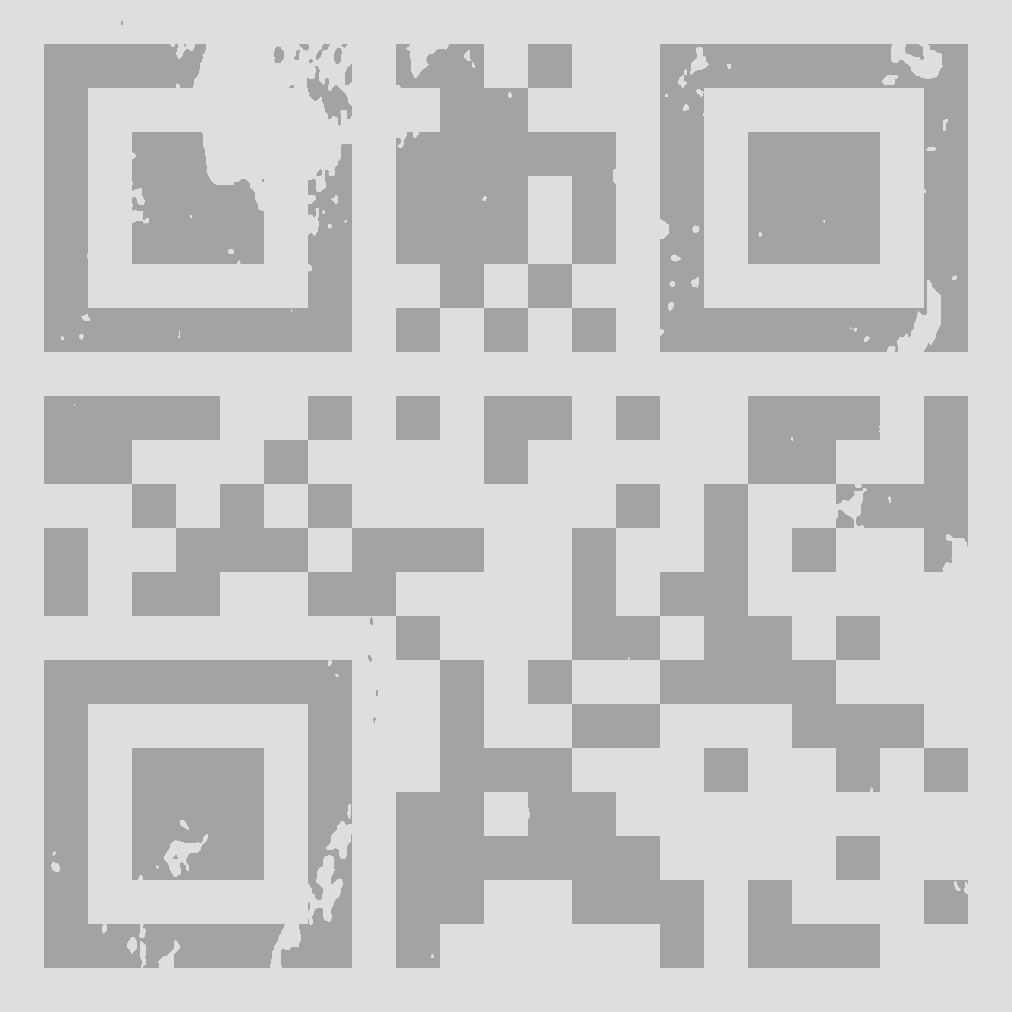

In [ ]:
img8_gray = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)
print(img8_gray.shape)
cv2_imshow(img8_gray)

##Histogram

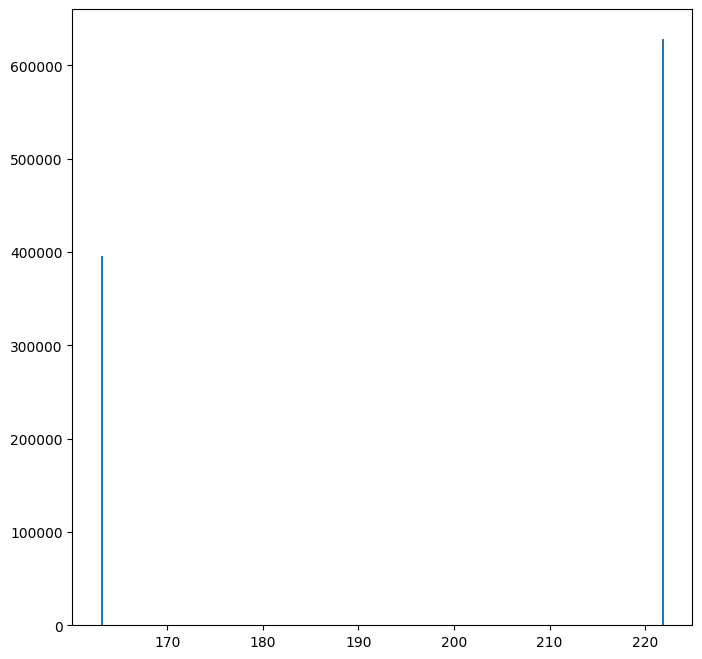

In [ ]:
plt.figure(figsize=(8,8));
plt.hist(img8_gray.ravel(), bins=256)
plt.show()

##Black and White

In [ ]:
img_contrast8 = cv2.equalizeHist(img8_gray)

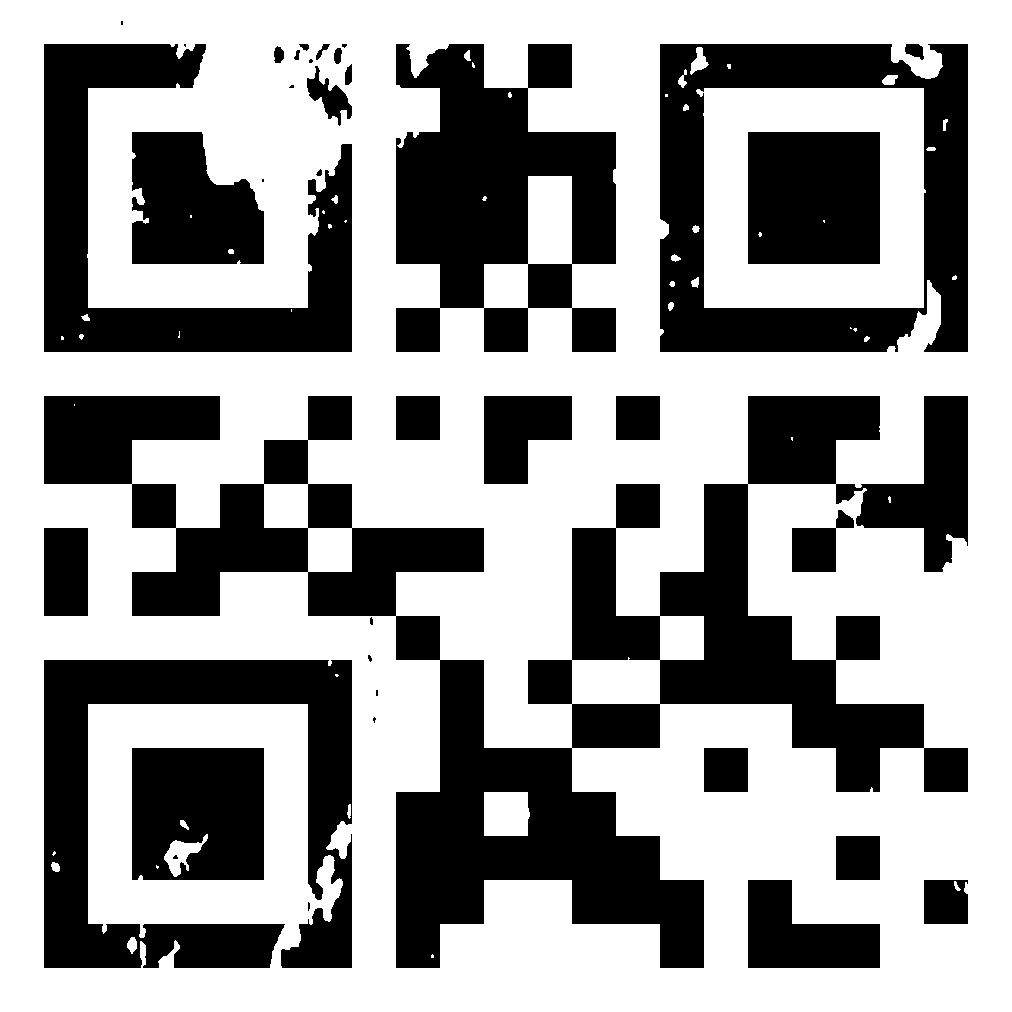

In [ ]:
cv2_imshow(img_contrast8)

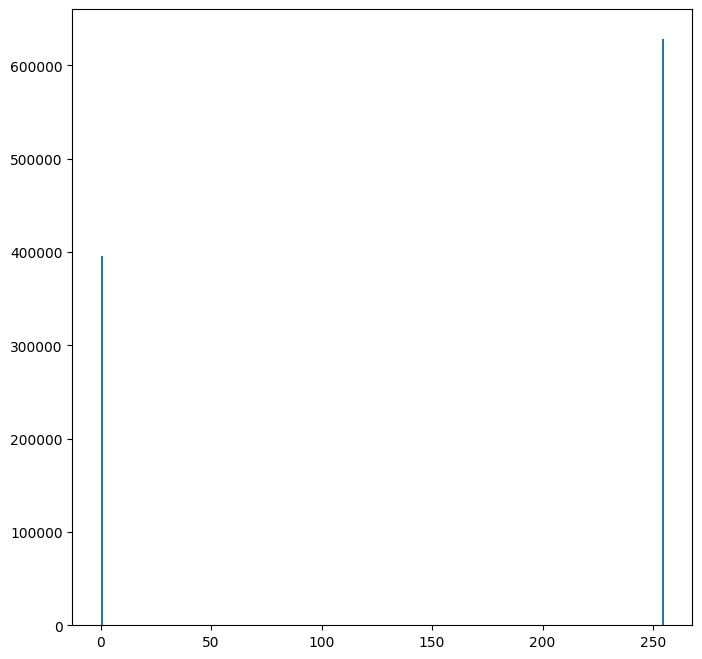

In [ ]:
plt.figure(figsize=(8,8));
plt.hist(img_contrast8.ravel(), bins=256)
plt.show()

##Hole filling

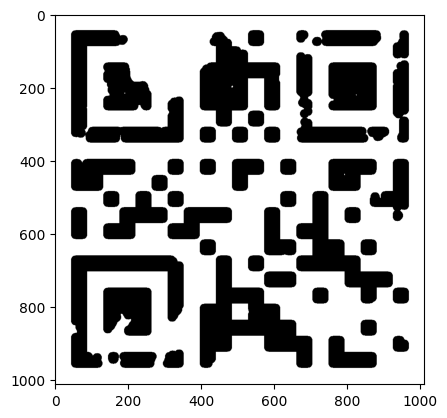

In [ ]:
img_contrast8_closed = cv2.morphologyEx(img_contrast8, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25)))
plt.imshow(img_contrast8_closed, cmap='gray');

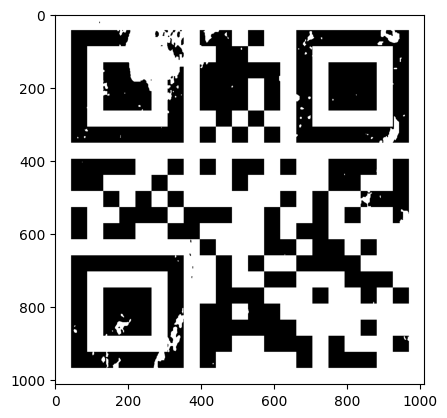

In [ ]:
_, img_contrast8_binarized = cv2.threshold(img_contrast8, 220, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_contrast8_binarized, cmap='gray');

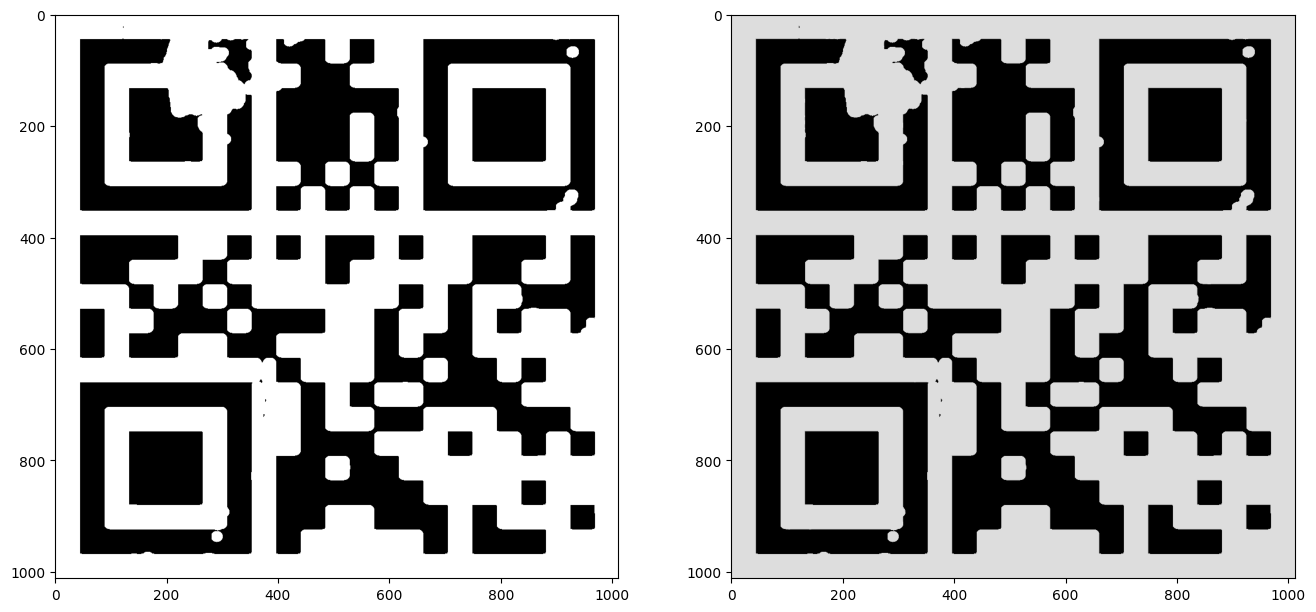

In [ ]:
img_contrast8_opened_33 = cv2.morphologyEx(img_contrast8, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20)))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax1.imshow(img_contrast8_opened_33, cmap='gray');
ax2.imshow((img_contrast8_opened_33 & img8_gray) + img_contrast8_opened_33, vmin=0, vmax=255, cmap='gray');

###Contour-Based Hole Filling

In [ ]:
# Find contours of objects
contours, _ = cv2.findContours(img_contrast8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw filled contours to fill holes
filled_image = np.zeros_like(img_contrast8)
cv2.drawContours(filled_image, contours, -1, 255, thickness=cv2.FILLED)

# Display the filled image
cv2_imshow(filled_image)

*imge lost*

find a way to fill

###edge detection

canny

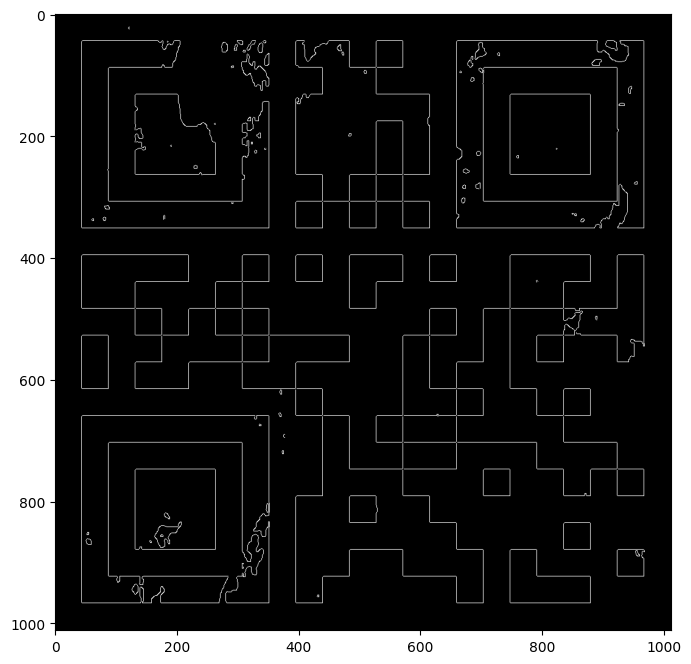

In [ ]:
img_blurred8 = cv2.GaussianBlur(src=img8, ksize=(3, 3), sigmaX=0)
img_canny = cv2.Canny(image=img8, apertureSize=3, threshold1=120, threshold2=200, L2gradient=True)
plt.figure(figsize=(12, 8))
plt.imshow(img_canny, cmap="gray");

hough

In [ ]:
import math
hough_lines = cv2.HoughLinesP(
    image=img8,
    rho=1,  # Distance resolution of the accumulator in pixels.
    theta=math.pi / 180,  # Angle resolution of the accumulator in radians.
    threshold=250,  # Voting threshold for accumulator.
    lines=None,
    minLineLength=200,  #  Line segments shorter than that are rejected.
    maxLineGap=20  # Maximum allowed gap between points on the same line to link them.
)
print(hough_lines[0])

[[  0 996 996   0]]


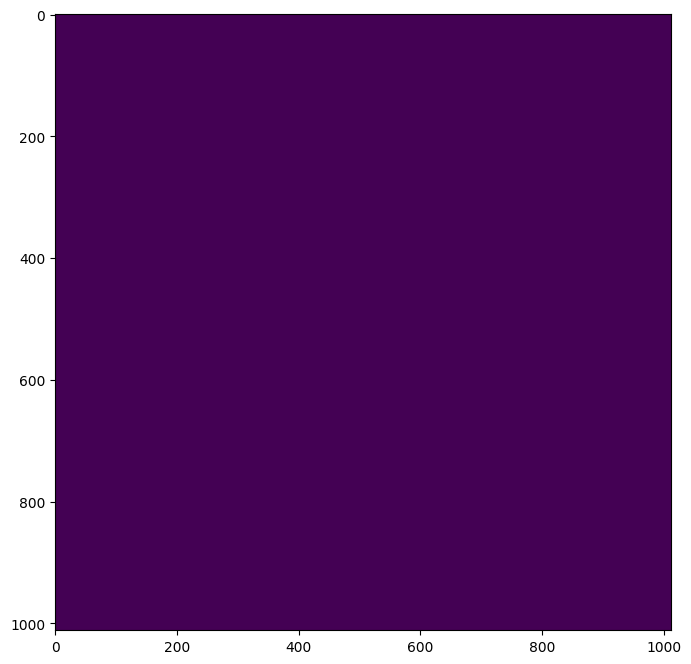

In [ ]:
img_hough = img_contrast8
for x0, y0, x1, y1 in hough_lines[:,0]:
    cv2.line(img_hough, (x0, y0), (x1, y1), (255,0,0), 2, cv2.LINE_AA)
plt.figure(figsize=(12, 8))
plt.imshow(img_hough);

Soble

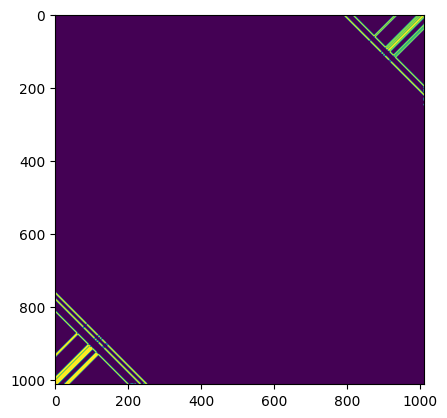

In [ ]:
grad_x = cv2.Sobel(img_contrast8, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_contrast8, cv2.CV_64F, 0, 1, ksize=3)
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
edges = cv2.threshold(grad_mag, 0, 255, cv2.THRESH_BINARY)[1]
plt.imshow(edges)

*figure it out*